In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report,roc_auc_score, RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold,GridSearchCV
import warnings
warnings.filterwarnings("ignore")

Preprocessing:

1. Fill the missing gender values with the most frequent values
2. Fill the missing income values by taking the mean and filling it with the mean
3. Filling the missing values in birthday count and converting it Age_in_years
4. Drop the null values in type_occupation
5. Outlier treatment - annual income, experience, family count
6. Binary Encoding
7. 

In [72]:
df = pd.read_csv("credit_card_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Type_Occupation  1060 non-null   object 
 13  Family_Members   1548 non-null   int64  
 14  Rejected         1548 non-null   int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 181.5+ KB


In [73]:
#since we dont require the ind_id column

df = df.drop("Ind_ID", axis=1)
df.sample(10)

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Type_Occupation,Family_Members,Rejected
123,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23286.0,365243,NaN,2,0
717,F,N,Y,0,247500.0,Working,Secondary / secondary special,Married,House / apartment,-11268.0,-2545,Laborers,2,0
1341,F,N,Y,0,135000.0,State servant,Higher education,Single / not married,Municipal apartment,-10660.0,-1935,Core staff,1,1
1485,F,N,Y,0,135000.0,Working,Secondary / secondary special,Separated,House / apartment,-14760.0,-1315,NaN,1,0
1319,F,Y,N,0,180000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-20395.0,365243,NaN,1,0
388,F,N,Y,0,202500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21126.0,365243,NaN,1,0
834,F,Y,N,0,202500.0,Commercial associate,Secondary / secondary special,Civil marriage,With parents,-14228.0,-5330,NaN,2,0
728,F,Y,Y,1,270000.0,Working,Higher education,Separated,House / apartment,-14052.0,-140,Sales staff,2,0
573,F,N,Y,0,40500.0,Working,Secondary / secondary special,Married,House / apartment,-12729.0,-4936,Cleaning staff,2,0
1126,M,N,N,0,202500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15323.0,-8290,Laborers,1,0


In [74]:
print("Duplicate rows: ", df.duplicated().sum())
print("Null Values: ", df.isnull().sum())

df = df.drop_duplicates()
print("After deleting duplicate rows: ", df.duplicated().sum())

Duplicate rows:  162
Null Values:  GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Type_Occupation    488
Family_Members       0
Rejected             0
dtype: int64
After deleting duplicate rows:  0


In [75]:
#replacing irrelevant values
df['Marital_status'].unique()
df.Marital_status= df.Marital_status.replace('Civil marriage','Married')
df.Marital_status= df.Marital_status.replace('Widow','Separated')
df.Marital_status= df.Marital_status.replace('Single / not married','Single')

In [76]:
#creating a new column with age
df['Age'] = np.abs((df['Birthday_count'])/365)

In [77]:
#converting employed days to experience in YEARS
df['Work_experience']= np.abs(df['Employed_days'])/365

In [78]:
#filling missing values in Gender by most populated values
df['GENDER'].fillna(value=df['GENDER'].mode()[0], inplace=True)
df['GENDER'].value_counts()

F    879
M    507
Name: GENDER, dtype: int64

In [79]:
#filling missing values in annual income by using the calculated mean of each type
df['Annual_income'].fillna(df.groupby('Type_Income')['Annual_income'].transform('mean'), inplace=True)

In [80]:
df.isnull().sum()

GENDER               0
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income        0
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Type_Occupation    438
Family_Members       0
Rejected             0
Age                 22
Work_experience      0
dtype: int64

In [81]:
#filling missing values in age by calculating mean using the income type
df['Age'].fillna(df.groupby('Type_Income')['Age'].transform('mean'), inplace=True)
df.isnull().sum()

GENDER               0
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income        0
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Type_Occupation    438
Family_Members       0
Rejected             0
Age                  0
Work_experience      0
dtype: int64

In [82]:
#since there is alot of missing values in the type_occupation
#instead of dropping the values (rows) we will be dropping the the whole column
#along with the birthday counts and employed days that we already converted

df.drop(columns = ['Type_Occupation', 'Birthday_count', 'Employed_days'] , inplace = True, axis = 1)
df.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Family_Members,Rejected,Age,Work_experience
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,2,1,51.430137,1000.665753
1,F,Y,Y,2,135000.0,Working,Secondary / secondary special,Married,House / apartment,4,0,43.180822,8.693151
2,F,N,Y,0,247500.0,Commercial associate,Higher education,Separated,Rented apartment,1,0,46.619178,3.690411
3,M,Y,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,2,0,27.197260,2.268493
4,F,N,Y,2,216000.0,State servant,Higher education,Married,House / apartment,4,0,42.312329,8.526027


In [83]:
#Binary Encoding
df['GENDER'] = df['GENDER'].map({'M':1,'F':0})
df['Car_Owner'] = df['Car_Owner'].map({'Y':1,'N':0})
df['Propert_Owner'] = df['Propert_Owner'].map({'Y':1,'N':0})

df.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Family_Members,Rejected,Age,Work_experience
0,1,1,1,0,180000.0,Pensioner,Higher education,Married,House / apartment,2,1,51.430137,1000.665753
1,0,1,1,2,135000.0,Working,Secondary / secondary special,Married,House / apartment,4,0,43.180822,8.693151
2,0,0,1,0,247500.0,Commercial associate,Higher education,Separated,Rented apartment,1,0,46.619178,3.690411
3,1,1,1,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,2,0,27.197260,2.268493
4,0,0,1,2,216000.0,State servant,Higher education,Married,House / apartment,4,0,42.312329,8.526027


In [84]:
#mapping education by ranks - 1, 2, 3, 4

education_mapping = {
    'Lower secondary': 0,
    'Secondary / secondary special': 1,
    'Incomplete higher': 2,
    'Higher education': 3,
    'Academic degree': 4
}

df['EDUCATION'] = df['EDUCATION'].map(education_mapping)

In [85]:
#one hot encoding - converts categorical variables into a binary matrix of each category
df = pd.get_dummies(df, columns=['Type_Income','Marital_status','Housing_type'],drop_first=True)  #drop_first to avoid multicolinearity

In [86]:
df.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,EDUCATION,Family_Members,Rejected,Age,Work_experience,Type_Income_Pensioner,Type_Income_State servant,Type_Income_Working,Marital_status_Separated,Marital_status_Single,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents
0,1,1,1,0,180000.0,3,2,1,51.430137,1000.665753,1,0,0,0,0,1,0,0,0,0
1,0,1,1,2,135000.0,1,4,0,43.180822,8.693151,0,0,1,0,0,1,0,0,0,0
2,0,0,1,0,247500.0,3,1,0,46.619178,3.690411,0,0,0,1,0,0,0,0,1,0
3,1,1,1,0,157500.0,1,2,0,27.197260,2.268493,0,0,1,0,0,1,0,0,0,0
4,0,0,1,2,216000.0,3,4,0,42.312329,8.526027,0,1,0,0,0,1,0,0,0,0


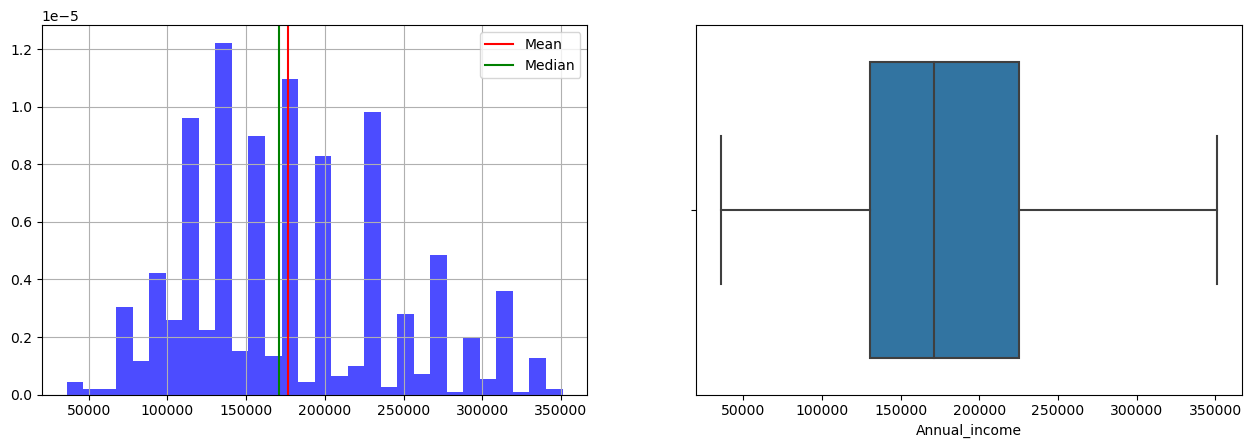

In [193]:
#Annual Income before treating the outliers
plt.subplot(1,2,1)
plt.hist(df['Annual_income'], bins=30, color='blue', density=True, alpha=0.7)
plt.axvline(x=np.mean(df['Annual_income']), color="red", label="Mean")
plt.axvline(x=np.median(df['Annual_income']), color="green", label="Median")
plt.grid()
plt.legend()

plt.subplot(1,2,2)  # nrows=1, ncols=2
sns.boxplot(data=df, x='Annual_income')

plt.subplots_adjust(right=2.0)
plt.show()

In [88]:
def treating_outliers(col, df):
    Q1 = np.percentile(df[col], 25 , interpolation='midpoint')
    Q3 = np.percentile(df[col], 75 ,interpolation='midpoint')

    IQR = Q3-Q1

    upper_limit = Q3 + 1.5 * IQR
    upper_limit
    return df[df[col] < upper_limit]

In [89]:
df = treating_outliers('Work_experience', df)
df = treating_outliers('Annual_income', df)

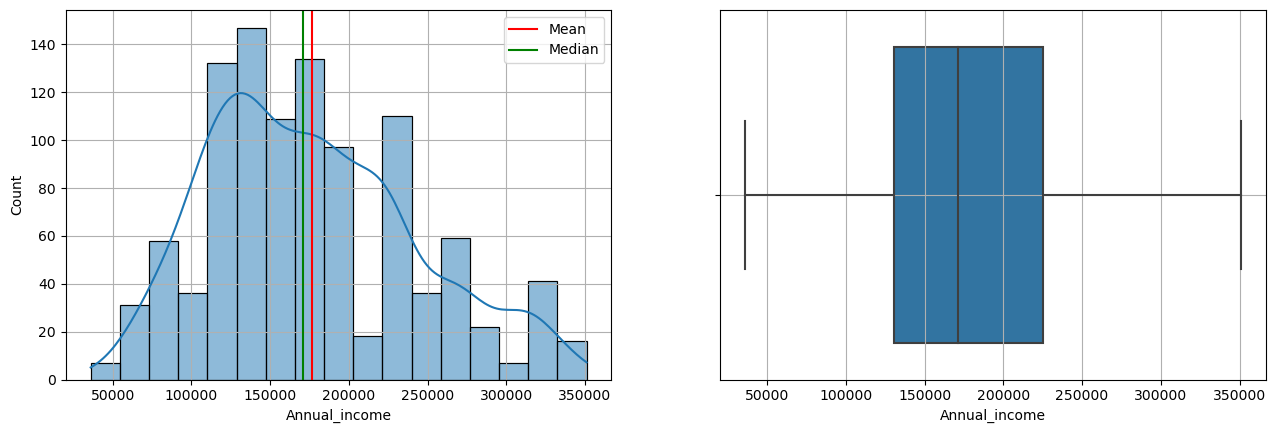

In [192]:
#Annual income after treating the outliers
plt.subplot(1,2,1)
sns.histplot(data=df, x='Annual_income',kde=True)
plt.axvline(x=df['Annual_income'].mean(),color="red",label="Mean")
plt.axvline(x=df['Annual_income'].median(),color="green",label="Median")
plt.grid()
plt.legend()

plt.subplot(1,2,2)  # nrows=1, ncols=2
sns.boxplot(data=df, x='Annual_income')

plt.subplots_adjust(right=2.0)
plt.grid()
plt.show()

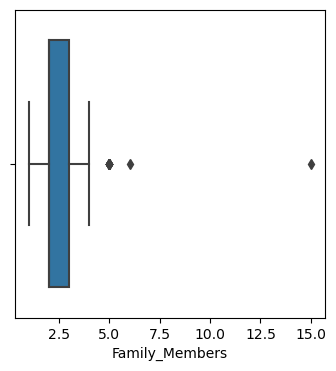

In [91]:
#family members is a different case with one particular outlier
plt.figure(figsize = (4,4))
sns.boxplot(data = df , x = 'Family_Members')
plt.show()


In [92]:
df = df[df['Family_Members'] < 6] #setting an upper limit manually

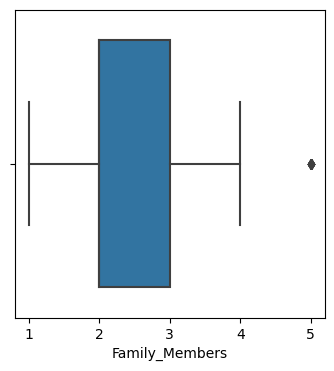

In [191]:
plt.figure(figsize = (4,4))
sns.boxplot(data = df , x = 'Family_Members')
plt.show()

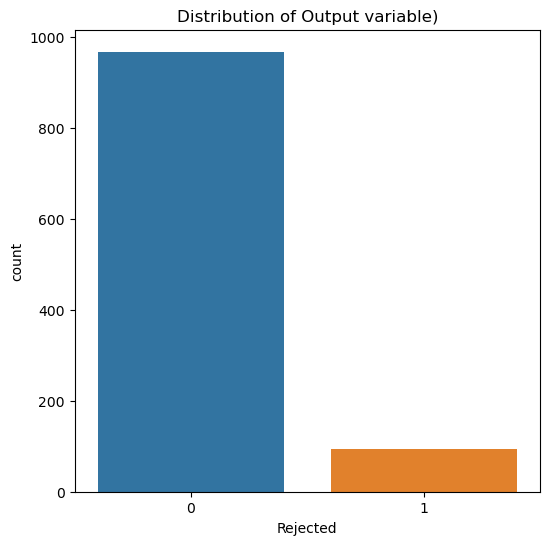

In [189]:
#we have a highly imbalanced data
plt.figure(figsize = (6, 6))
sns.countplot(data = df, x = 'Rejected')
plt.title("Distribution of Output variable)")
plt.show()

In [95]:
df['Rejected'].value_counts()

0    967
1     93
Name: Rejected, dtype: int64

In [96]:
def performing_smote(X, Y, k=5, oversample_ratio=1.0):
    """
    Custom implementation of SMOTE oversampling.

    Parameters:
    - X: Feature matrix
    - Y: Target variable
    - k: Number of nearest neighbors to consider
    - oversample_ratio: Ratio of oversampling (e.g., 1.0 means balance the classes)

    Returns:
    - Oversampled feature matrix and target variable as DataFrames
    """
    # Separate minority and majority classes
    minority_class = X[Y == 1]
    majority_class = X[Y == 0]

    # Calculate the number of samples to generate
    num_samples = int(len(minority_class) * oversample_ratio)

    # Randomly select samples from the minority class
    random_indices = np.random.choice(len(minority_class), num_samples, replace=True)
    minority_samples = minority_class[random_indices]

    # Compute Euclidean distances between minority samples
    distances = np.linalg.norm(minority_samples[:, np.newaxis, :] - minority_class, axis=2)

    # Find k-nearest neighbors
    nearest_neighbors_indices = np.argpartition(distances, k, axis=1)[:, :k]

    # Generate synthetic samples
    synthetic_samples = []
    for i, neighbors in enumerate(nearest_neighbors_indices):
        for _ in range(int(oversample_ratio)):
            neighbor = minority_class[neighbors[np.random.randint(k)]]
            alpha = np.random.rand()
            synthetic_sample = minority_samples[i] + alpha * (neighbor - minority_samples[i])
            synthetic_samples.append(synthetic_sample)

    # Combine minority samples, majority samples, and synthetic samples
    oversampled_X = pd.DataFrame(np.vstack((X, np.array(synthetic_samples))))
    oversampled_Y = pd.DataFrame(np.hstack((Y, np.ones(len(synthetic_samples)))))

    return oversampled_X, oversampled_Y

In [185]:
def oversample_smote_df(X, y, k_neighbors=5):
    # Separate data into majority and minority classes
    majority_indices = np.where(y == 0)[0]
    minority_indices = np.where(y == 1)[0]

    # Calculate the number of synthetic samples to generate
    num_synthetic_samples = len(majority_indices) - len(minority_indices)

    # Randomly select k neighbors for each sample in the minority class
    synthetic_samples = []
    for minority_index in minority_indices:
        neighbors_indices = np.random.choice(minority_indices, size=k_neighbors, replace=True)
        neighbors = X[neighbors_indices]

        # Create synthetic samples by combining the minority sample with its neighbors
        for _ in range(num_synthetic_samples // len(minority_indices)):
            weights = np.random.uniform(0, 1, size=X.shape[1])
            synthetic_sample = X[minority_index] + weights.mean() * (neighbors.mean(axis=0) - X[minority_index])
            synthetic_samples.append(synthetic_sample)

    # Combine the original majority class with the synthetic samples to create the oversampled arrays
    x_oversampled = np.vstack([X, np.array(synthetic_samples)])
    y_oversampled = np.concatenate([y, np.ones(len(synthetic_samples), dtype=int)])

    # Create DataFrames for the oversampled data
    columns = df.columns.drop('Rejected')
    X_df = pd.DataFrame(x_oversampled, columns=columns)
    y_df = pd.DataFrame(y_oversampled, columns=['Rejected'])

    return X_df, y_df


In [198]:
def pairwise_distances(from_data, to_data):
    return np.sqrt(np.sum((from_data[:, np.newaxis, :] - to_data[np.newaxis, :, :])**2,axis=2))

In [207]:
def custom_smote(X, y, k=5, oversample_ratio=1.0): #no3
    # Find minority class samples
    minority_indices = np.where(y == 1)[0]
    minority_samples = X[minority_indices]

    # Calculate pairwise distances
    distances = pairwise_distances(minority_samples, minority_samples)

    # Generate synthetic samples
    synthetic_samples = []
    for i, sample in enumerate(minority_samples):
        nearest_neighbors = np.argsort(distances[i])[1:k+1]  # Exclude the sample itself

        for neighbor_index in nearest_neighbors:
            alpha = np.random.uniform(0, 1, size=X.shape[1])
            synthetic_sample = sample + alpha * (minority_samples[neighbor_index] - sample)
            synthetic_samples.append(synthetic_sample)

    # Combine original and synthetic samples
    synthetic_samples = np.array(synthetic_samples)
    # X_resampled = np.vstack([X, synthetic_samples])
    # y_resampled = np.hstack([y, np.ones(len(synthetic_samples))])

    oversampled_X = pd.DataFrame(np.vstack((X, np.array(synthetic_samples))))
    oversampled_Y = pd.DataFrame(np.hstack((Y, np.ones(len(synthetic_samples)))))

    return oversampled_X, oversampled_Y

In [208]:
X_resampled, y_resampled = custom_smote(X, Y, k=5, oversample_ratio=1.0)

In [186]:
X = df.drop(columns=['Rejected']).to_numpy()
Y = df['Rejected'].to_numpy()
XOS, YOS = oversample_smote_df(X, Y)


In [179]:
X = df.drop(columns=['Rejected']).to_numpy()
Y = df['Rejected'].to_numpy()

Xos, Yos = performing_smote(X, Y, k=5, oversample_ratio=1.0)

In [251]:
y_resampled.value_counts()

0.0    967
1.0    558
dtype: int64

In [181]:
Yos.value_counts()

0.0    967
1.0    186
dtype: int64

In [196]:
def manual_train_test_split(X, Y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    # Shuffle the indices
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    # Calculate the split index
    split_index = int((1 - test_size) * len(X))
    if split_index <= 0 or split_index >= len(X):
        raise ValueError("Invalid split index. Check the size of your dataset.")

    # Split the data
    X_train, X_test = X[indices[:split_index]], X[indices[split_index:]]
    y_train, y_test = y[indices[:split_index]], y[indices[split_index:]]

    return X_train, X_test, Y_train, Y_test

In [209]:
X_train, X_test, Y_train, Y_test = manual_train_test_split(X_resampled, y_resampled, test_size=0.1, random_state=2)

KeyError: '[1108, 665, 421, 246, 1459, 286, 1460, 1374, 672, 69, 403, 45, 1081, 349, 365, 1352, 405, 532, 734, 363, 333, 1301, 501, 1484, 1184, 1230, 901, 1494, 678, 268, 1209, 1283, 181, 1187, 76, 183, 1097, 776, 263, 398, 861, 1504, 1039, 476, 745, 1292, 142, 1164, 1242, 199, 137, 1062, 1133, 239, 248, 287, 1501, 715, 550, 1299, 952, 903, 197, 624, 835, 652, 1322, 503, 512, 1388, 781, 1123, 1312, 1150, 494, 1139, 564, 498, 145, 921, 472, 157, 204, 1437, 1036, 411, 928, 1507, 1421, 547, 691, 436, 1171, 1440, 675, 1411, 1303, 834, 1428, 827, 272, 71, 1327, 883, 1136, 968, 143, 1470, 68, 58, 278, 481, 1182, 948, 504, 1446, 1339, 925, 922, 1477, 724, 782, 757, 659, 418, 736, 488, 1202, 590, 696, 1229, 1147, 453, 931, 1331, 101, 1134, 941, 1037, 1452, 814, 1464, 542, 1104, 728, 756, 65, 1056, 1353, 508, 1224, 880, 487, 318, 557, 1176, 1244, 455, 1120, 1509, 792, 705, 579, 553, 1505, 1228, 606, 370, 46, 1250, 1321, 452, 1285, 1488, 1152, 549, 226, 1391, 798, 771, 1449, 173, 556, 844, 1241, 1183, 1173, 273, 1487, 1252, 1365, 1082, 929, 540, 305, 1445, 1028, 230, 114, 332, 123, 1130, 701, 1094, 796, 1181, 308, 1376, 479, 484, 1430, 640, 535, 1194, 1044, 593, 1054, 33, 336, 598, 502, 1412, 1342, 369, 419, 874, 819, 1455, 803, 52, 1245, 356, 663, 1007, 1492, 1268, 241, 1266, 799, 1014, 763, 93, 1026, 1240, 1091, 575, 462, 464, 280, 161, 1008, 1191, 1316, 1220, 112, 1156, 109, 649, 735, 188, 1317, 1226, 385, 1486, 307, 681, 352, 387, 526, 1306, 704, 690, 932, 794, 1160, 1290, 311, 283, 457, 256, 212, 259, 584, 492, 870, 235, 367, 1348, 448, 1387, 21, 1434, 544, 826, 694, 1247, 70, 1367, 788, 682, 1003, 20, 600, 720, 1121, 1217, 1330, 1105, 525, 128, 1523, 84, 1211, 926, 612, 341, 323, 1061, 1500, 773, 1328, 881, 664, 1095, 944, 857, 1090, 1511, 431, 102, 1260, 994, 1372, 47, 354, 185, 171, 400, 732, 859, 824, 61, 807, 737, 1414, 667, 285, 194, 963, 845, 951, 1233, 571, 1467, 1163, 1271, 1221, 653, 1357, 417, 1256, 611, 662, 871, 127, 402, 361, 743, 169, 1493, 119, 993, 996, 1297, 1142, 1524, 1496, 1407, 470, 200, 1310, 249, 377, 315, 146, 465, 744, 1400, 1448, 141, 711, 1167, 729, 355, 1046, 335, 67, 1489, 1481, 1058, 82, 325, 1213, 1023, 158, 1148, 863, 1456, 618, 560, 1154, 1158, 1196, 1518, 739, 1341, 496, 603, 846, 99, 328, 468, 1329, 83, 1178, 1480, 1084, 1280, 1122, 582, 215, 1264, 477, 1476, 80, 1018, 37, 1432, 505, 541, 619, 391, 182, 374, 519, 1001, 608, 66, 995, 717, 1205, 407, 873, 1416, 1186, 172, 580, 1279, 330, 810, 284, 978, 1249, 1197, 1239, 1258, 232, 1510, 568, 748, 1067, 625, 1089, 930, 572, 627, 954, 721, 1499, 1124, 651, 270, 614, 460, 573, 688, 1227, 60, 201, 265, 789, 699, 399, 1027, 279, 301, 795, 915, 1131, 28, 129, 240, 1513, 666, 888, 1273, 916, 529, 451, 866, 126, 961, 347, 1116, 116, 104, 829, 379, 351, 293, 1236, 887, 1272, 1308, 91, 23, 1042, 1088, 90, 1040, 523, 1307, 658, 953, 1113, 956, 1006, 1442, 1072, 779, 983, 601, 645, 223, 1096, 213, 825, 1325, 1140, 848, 77, 1092, 388, 597, 439, 997, 843, 586, 821, 1254, 955, 551, 1415, 297, 545, 543, 277, 1405, 322, 490, 1420, 802, 1168, 980, 966, 1395, 1144, 1015, 957, 1198, 221, 1385, 1334, 837, 1417, 1345, 309, 1463, 1053, 281, 1276, 1323, 148, 397, 851, 327, 486, 577, 677, 522, 1201, 1031, 271, 643, 1146, 86, 164, 1315, 842, 555, 193, 326, 343, 108, 155, 530, 1216, 375, 738, 1389, 770, 480, 1392, 1064, 940, 1443, 1288, 471, 1284, 765, 695, 75, 134, 437, 1403, 319, 991, 914, 1318, 1426, 321, 567, 897, 251, 1212, 1098, 1361, 62, 1351, 89, 1427, 719, 156, 441, 1274, 731, 414, 1101, 552, 511, 1401, 521, 909, 1267, 708, 473, 1025, 761, 1473, 180, 727, 755, 1378, 401, 1516, 813, 345, 886, 250, 295, 1170, 981, 853, 1383, 262, 120, 1359, 1246, 219, 267, 368, 192, 290, 692, 697, 790, 1390, 1450, 877, 546, 74, 1368, 784, 252, 432, 1153, 596, 1424, 768, 654, 988, 999, 209, 787, 801, 1366, 179, 1048, 513, 312, 440, 621, 160, 911, 376, 205, 288, 56, 684, 384, 500, 1137, 949, 231, 1275, 425, 1218, 741, 310, 589, 237, 236, 426, 967, 1356, 581, 1135, 175, 1141, 1203, 1114, 1471, 456, 816, 1491, 823, 1466, 317, 1522, 982, 671, 1289, 152, 558, 986, 1382, 923, 1248, 1286, 1380, 752, 786, 1363, 574, 1320, 264, 291, 1305, 599, 977, 154, 1043, 22, 862, 1429, 1502, 885, 1059, 1419, 809, 258, 227, 316, 946, 107, 1394, 1166, 427, 85, 1185, 1118, 1077, 592, 610, 1506, 524, 30, 960, 438, 342, 710, 1336, 458, 1257, 669, 1132, 125, 257, 1199, 847, 313, 891, 1065, 1068, 198, 628, 409, 1281, 716, 849, 174, 1282, 1086, 839, 469, 202, 971, 595, 631, 177, 275, 907, 412, 483, 1468, 1457, 475, 1051, 538, 615, 984, 117, 536, 1127, 1298, 641, 602, 1210, 1189, 1034, 163, 111, 344, 1190, 1479, 482, 1332, 1277, 130, 1293, 1300, 338, 905, 1358, 72, 514, 969, 515, 1222, 378, 447, 985, 208, 303, 576, 620, 943, 1066, 565, 1381, 693, 1291, 1373, 644, 882, 340, 917, 346, 1438, 1324, 304, 36, 811, 42, 1237, 394, 878, 1313, 1223, 733, 459, 707, 423, 1497, 945, 879, 294, 585, 26, 680, 1055, 1423, 135, 510, 210, 1115, 353, 964, 1259, 852, 55, 463, 1433, 1454, 856, 216, 1371, 40, 884, 396, 1465, 1063, 1251, 1396, 998, 1408, 178, 176, 740, 507, 570, 920, 1333, 300, 1435, 990, 639, 563, 1263, 78, 518, 1078, 726, 228, 818, 1076, 50, 29, 633, 656, 561, 1346, 840, 225, 1143, 203, 444, 371, 32, 1129, 1215, 965, 1393, 893, 668, 1214, 1238, 958, 334, 382, 1145, 1278, 372, 151, 959, 778, 222, 386, 702, 642, 429, 1195, 1355, 1304, 445, 854, 1458, 41, 833, 113, 48, 289, 1021, 206, 973, 632, 775, 889, 899, 832, 683, 1379, 617, 685, 869, 673, 749, 1002, 1079, 408, 629, 1398, 646, 139, 1125, 913, 165, 1100, 812, 214, 131, 314, 138, 1200, 416, 1029, 38, 53, 706, 136, 1384, 793, 35, 25, 657, 449, 578, 302, 1422, 1475, 1165, 1052, 1193, 777, 1503, 244, 103, 276, 393, 110, 588, 159, 970, 747, 1179, 1111, 660, 1161, 339, 329, 133, 637, 167, 1397, 927, 860, 1020, 1482, 24, 806, 1413, 443, 150, 1309, 94, 1354, 217, 381, 1047, 780, 900, 1436, 864, 292, 712, 100, 1049, 783, 1206, 489, 700, 1155, 750, 962, 1012, 242, 168, 73, 559, 1319, 1495, 1270, 118, 1138, 520, 713, 992, 254, 1093, 1038, 383, 1102, 516, 54, 467, 266, 1033, 583, 766, 537, 1441, 59, 1177, 166, 1265, 815, 331, 247, 373, 1204, 499, 1207, 1180, 636, 616, 1370, 1174, 566, 234, 626, 430, 1010, 1364, 191, 1188, 1175, 435, 836, 1255, 1016, 184, 687, 638, 569, 933, 1169, 533, 1520, 1517, 742, 196, 1515, 495, 591, 936, 1041, 979, 380, 27, 395, 320, 147, 797, 623, 238, 1009, 910, 895, 1335, 106, 350, 650, 389, 1004, 1117, 554, 1439, 170, 1253, 306, 415, 1485, 1296, 428, 186, 1005, 908, 269, 867, 630, 950, 162, 413, 1344, 95, 98, 1030, 876, 817, 822, 207, 974, 686, 872, 245, 229, 906, 896, 1418, 1402, 1447, 865, 1338, 791, 1022, 189, 260, 144, 828, 698, 919, 1410, 937, 1035, 1377, 890, 594, 531, 894, 1483, 1151, 57, 1057, 1261, 282, 934, 362, 243, 92, 1234, 337, 1013, 947, 1109, 190, 39, 975, 634, 764, 723, 1128, 63, 233, 676, 105, 753, 902, 253, 422, 774, 1232, 858, 924, 79, 989, 1106, 497, 1462, 87, 64, 1294, 605, 274, 1512, 1362, 1444, 153, 613, 410, 830, 912, 517, 44, 390, 220, 140, 357, 722, 1157, 261, 1302, 898, 1103, 195, 115, 1075, 1073, 718, 1472, 1208, 1369, 358, 1060, 1019, 1000, 935, 754, 420, 149, 1069, 1119, 1451, 534, 548, 298, 976, 1314, 1337, 122, 1399, 1360, 1159, 1406] not in index'

In [216]:
def train_test_split_custom(*arrays, test_size=None, random_state=None):
    n_samples = len(arrays[0])
    test_size = 0.2 if test_size is None else test_size

    if random_state:
        np.random.seed(random_state)

    num_test_samples = int(test_size * n_samples)
    indices = np.random.permutation(n_samples)
    test_indices = indices[:num_test_samples]
    train_indices = indices[num_test_samples:]

    # Create the training and testing sets
    result = tuple([array.iloc[train_indices] for array in arrays] + [array.iloc[test_indices] for array in arrays])
    return result

In [246]:
X_trainn, X_testt, y_trainn, y_testt = train_test_split_custom(X_resampled, y_resampled, test_size=0.20, random_state=42)

## Random Forest Classifier Attempt

In [242]:
def test_split(index, value, X, y):
    left_mask = X[:, index] < value
    right_mask = ~left_mask
    return X[left_mask], X[right_mask], y[left_mask], y[right_mask]

# Function to calculate Gini index
def gini_index(groups, classes):
    total_samples = sum(len(group) for group in groups)
    gini = 0.0
    for group in groups:
        group_size = len(group)
        if group_size == 0:
            continue
        proportion = group_size / total_samples
        gini += (1.0 - np.sum((np.sum(group == cls) / group_size) ** 2 for cls in classes)) * proportion
    return gini

# Function to find the best split point for a dataset
# def get_split(X, y, n_features):
#     classes = np.unique(y)
#     b_index, b_value, b_score, b_groups = 999, 999, 999, None
#     features = np.random.choice(X.shape[1], n_features, replace=False)
#     for index in features:
#         for row in range(X.shape[0]):
#             groups = test_split(index, X[row, index], X, y)
#             gini = gini_index(groups, classes)
#             if gini < b_score:
#                 b_index, b_value, b_score, b_groups = index, X[row, index], gini, groups
#     return {'index': b_index, 'value': b_value, 'groups': b_groups}

def get_split(X, y, n_features):
    classes = np.unique(y)
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    features = np.random.choice(X.shape[1], n_features, replace=False)
    for index in features:
        for row in range(X.shape[0]):
            groups = test_split(index, X[row, index], X, y)
            if groups is None:
                continue
                
            gini = gini_index(groups, classes)
            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, X[row, index], gini, groups
    return {'index': b_index, 'value': b_value, 'groups': b_groups}
# Function to create a terminal node value
def to_terminal(group):
    return np.argmax(np.bincount(group))

# Recursive function to build a decision tree
# def build_tree(X, y, max_depth, min_size, n_features, depth):
#     node = get_split(X, y, n_features)
#     left, right, left_y, right_y = node['groups']
#     del node['groups']
    
#     if not left_y.tolist() or not right_y.tolist():
#         node['left'] = node['right'] = to_terminal(left_y.tolist() + right_y.tolist())
#         return node
    
#     if depth >= max_depth:
#         node['left'], node['right'] = to_terminal(left_y), to_terminal(right_y)
#         return node
    
#     node['left'] = build_tree(left, left_y, max_depth, min_size, n_features, depth + 1)
#     node['right'] = build_tree(right, right_y, max_depth, min_size, n_features, depth + 1)
    
#     return node

def build_tree(X, y, max_depth, min_size, n_features, depth):
    node = get_split(X, y, n_features)
    
    if node['groups'] is None:
        node['left'] = node['right'] = to_terminal(y.values.tolist())
        return node
    
    left, right, left_y, right_y = node['groups']
    del node['groups']
    
    if not left_y.tolist() or not right_y.tolist():
        node['left'] = node['right'] = to_terminal(left_y.tolist() + right_y.tolist())
        return node
    
    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left_y), to_terminal(right_y)
        return node
    
    node['left'] = build_tree(left, left_y, max_depth, min_size, n_features, depth + 1)
    node['right'] = build_tree(right, right_y, max_depth, min_size, n_features, depth + 1)
    
    return node

# Function to make a prediction with a decision tree
def predict(node, row):
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']

# Function to create a random forest
def random_forest(X, y, n_trees, max_depth, min_size, sample_size, n_features):
    trees = []
    for _ in range(n_trees):
        sample_indices = np.random.choice(X.index, size=int(sample_size * X.shape[0]), replace=True)
        
        # Ensure sampled indices are within the range of both X and y
        valid_indices = np.intersect1d(sample_indices, y.index)
        sample_X, sample_y = X.loc[valid_indices], y.loc[valid_indices]
        
        tree = build_tree(sample_X, sample_y, max_depth, min_size, n_features, 1)
        trees.append(tree)
    return trees


# Function to make a prediction with a random forest
def random_forest_predict(trees, row):
    predictions = [predict(tree, row) for tree in trees]
    return max(set(predictions), key=predictions.count)

In [241]:
n_trees = 10
max_depth = 5
min_size = 1
sample_size = 0.8  # Proportion of samples to use for each tree
n_features = int(np.sqrt(X_trainn.shape[1]))  # Use square root of the number of features

# Build the random forest
forest = random_forest(X_trainn, y_trainn, n_trees, max_depth, min_size, sample_size, n_features)

# Make predictions on the test set
predictions = [random_forest_predict(forest, row) for row in X_testt]

# Evaluate the accuracy
# accuracy = np.sum(predictions == Y_test) / len(Y_test)
# print(f"Random Forest Accuracy: {accuracy:.4f}")

accuracy = np.sum(predictions == y_testt) / len(y_testt)
print(f"Random Forest Accuracy: {accuracy:.4f}")

ValueError: attempt to get argmax of an empty sequence

In [236]:
def test_split(index, value, X, y):
    left_mask = X[:, index] < value
    right_mask = ~left_mask
    return X[left_mask], X[right_mask], y[left_mask], y[right_mask]

# Function to calculate Gini index
def gini_index(groups, classes):
    total_samples = sum(len(group) for group in groups)
    gini = 0.0
    for group in groups:
        group_size = len(group)
        if group_size == 0:
            continue
        proportion = group_size / total_samples
        gini += (1.0 - np.sum((np.sum(group == cls) / group_size) ** 2 for cls in classes)) * proportion
    return gini

# Function to find the best split point for a dataset
def get_split(X, y, n_features):
    classes = np.unique(y)
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    features = np.random.choice(X.shape[1], n_features, replace=False)
    for index in features:
        for row in range(X.shape[0]):
            groups = test_split(index, X[row, index], X, y)
            gini = gini_index(groups, classes)
            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, X[row, index], gini, groups
    return {'index': b_index, 'value': b_value, 'groups': b_groups}

# Function to create a terminal node value
def to_terminal(group):
    return np.argmax(np.bincount(group))

# Recursive function to build a decision tree
def build_tree(X, y, max_depth, min_size, n_features, depth):
    node = get_split(X, y, n_features)
    left, right, left_y, right_y = node['groups']
    del node['groups']
    
    if not left_y.tolist() or not right_y.tolist():
        node['left'] = node['right'] = to_terminal(left_y.tolist() + right_y.tolist())
        return node
    
    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left_y), to_terminal(right_y)
        return node
    
    node['left'] = build_tree(left, left_y, max_depth, min_size, n_features, depth + 1)
    node['right'] = build_tree(right, right_y, max_depth, min_size, n_features, depth + 1)
    
    return node

# Function to make a prediction with a decision tree
def predict(node, row):
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']

# Function to create a random forest
def random_forest(X, y, n_trees, max_depth, min_size, sample_size, n_features):
    trees = []
    for _ in range(n_trees):
        sample_indices = np.random.choice(X.shape[0], size=int(sample_size * X.shape[0]), replace=True)
        sample_X, sample_y = X[sample_indices], y[sample_indices]
        tree = build_tree(sample_X, sample_y, max_depth, min_size, n_features, 1)
        trees.append(tree)
    return trees

# Function to make a prediction with a random forest
def random_forest_predict(trees, row):
    predictions = [predict(tree, row) for tree in trees]
    return max(set(predictions), key=predictions.count)

In [243]:
n_trees = 10
max_depth = 5
min_size = 1
sample_size = 0.8  # Proportion of samples to use for each tree
n_features = int(np.sqrt(X_train.shape[1]))  # Use square root of the number of features

# Build the random forest
# forest = random_forest(X_trainn, y_trainn, n_trees, max_depth, min_size, sample_size, n_features)

forest = random_forest(X_train, Y_train, n_trees, max_depth, min_size, sample_size, n_features)

# Make predictions on the test set
predictions = [random_forest_predict(forest, row) for row in X_test_scaled_new]

# Evaluate the accuracy
accuracy = np.sum(predictions == Y_test) / len(Y_test)
print(f"Random Forest Accuracy: {accuracy:.4f}")

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [103]:
#feature scaling
def min_max_scaling(data):
    min_val = np.min(data, axis=0)
    max_val = np.max(data, axis=0)
    scaled_data = (data - min_val) / (max_val - min_val)
    return scaled_data

In [129]:
if np.isnan(X_test).any():
    # Handle missing values (e.g., by filling with mean or using another imputation strategy)
    X_test = np.nan_to_num(X_test, nan=np.nanmean(X_test, axis=0))

# Perform min-max scaling
X_train_scaled = min_max_scaling(X_train)
X_test_scaledd = min_max_scaling(X_test)

print("Original Training Data:")
print(X_train)
print("\nMin-Max Scaled Training Data:")
print(X_train_scaled)

print("\nOriginal Test Data:")
print(X_test)
print("\nMin-Max Scaled Test Data:")
print(X_test_scaledd)

if np.isnan(X_test).any():
    print('error')
else:
    print('no error')

Original Training Data:
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]

Min-Max Scaled Training Data:
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]

Original Test Data:
[[0. 0. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]

Min-Max Scaled Test Data:
[[0. 0. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
no error


In [104]:
X_train_scaled = min_max_scaling(X_train)
X_test_scaled = min_max_scaling(X_test)

print("Original Training Data:")
print(X_train)
print("\nMin-Max Scaled Training Data:")
print(X_train_scaled)

print("\nOriginal Test Data:")
print(X_test)
print("\nMin-Max Scaled Test Data:")
print(X_test_scaled)

Original Training Data:
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]

Min-Max Scaled Training Data:
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]

Original Test Data:
[[0. 0. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]

Min-Max Scaled Test Data:
[[0. 0. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [105]:
print('train samples ->', X_train.shape[0])
print('test samples ->', X_test.shape[0])

train samples -> 848
test samples -> 212


In [257]:
train_size = 848
test_size = 848
X_trainX = X_resampled[:train_size]
y_trainX = y_resampled[:train_size]

X_testX = X_resampled[train_size:train_size + test_size]
y_testX = y_resampled[train_size:train_size + test_size]

In [247]:
class CustomMinMaxScaler:
    def __init__(self):
        self.min_val = None
        self.max_val = None

    def fit_transform(self, data):
        self.min_val = np.min(data, axis=0)
        self.max_val = np.max(data, axis=0)
        scaled_data = (data - self.min_val) / (self.max_val - self.min_val)
        return scaled_data

    def transform(self, data):
        scaled_data = (data - self.min_val) / (self.max_val - self.min_val)
        return scaled_data

In [248]:
scaler = CustomMinMaxScaler()

X_train_scaled_new = scaler.fit_transform(X_train)
X_test_scaled_new = scaler.transform(X_test)

print("Original Training Data:")
print(X_train)
print("\nMin-Max Scaled Training Data:")
print(X_train_scaled_new)

print("\nOriginal Test Data:")
print(X_test)
print("\nMin-Max Scaled Test Data:")
print(X_test_scaled_new)

Original Training Data:
            0         1         2         3              4         5   \
788   0.000000  0.000000  1.000000  1.000000  157500.000000  1.000000   
803   1.000000  1.000000  1.000000  2.000000  180000.000000  3.000000   
1302  0.662759  0.000000  1.000000  0.974005  157500.000000  1.000000   
879   1.000000  1.000000  0.000000  0.000000  112500.000000  1.000000   
744   0.000000  0.000000  0.000000  0.000000   67500.000000  1.000000   
...        ...       ...       ...       ...            ...       ...   
1393  0.878728  0.382983  0.098393  0.000000  202500.000000  1.000000   
1344  1.000000  1.000000  0.853176  0.145114  240348.486963  2.731249   
527   0.000000  0.000000  1.000000  0.000000  216000.000000  1.000000   
1149  0.995074  0.985095  0.000000  0.397428  135000.000000  2.804601   
1289  0.000000  1.000000  0.000000  0.673533  135000.000000  1.000000   

            6          7         8    9    10        11   12        13  \
788   3.000000  47.293151

In [261]:
scaler = CustomMinMaxScaler()

X_train_scaled_newX = scaler.fit_transform(X_trainX)
X_test_scaled_newX = scaler.transform(X_testX)

print("Original Training Data:")
print(X_train)
print("\nMin-Max Scaled Training Data:")
print(X_train_scaled_new)

print("\nOriginal Test Data:")
print(X_test)
print("\nMin-Max Scaled Test Data:")
print(X_test_scaled_new)

Original Training Data:
            0         1         2         3              4         5   \
788   0.000000  0.000000  1.000000  1.000000  157500.000000  1.000000   
803   1.000000  1.000000  1.000000  2.000000  180000.000000  3.000000   
1302  0.662759  0.000000  1.000000  0.974005  157500.000000  1.000000   
879   1.000000  1.000000  0.000000  0.000000  112500.000000  1.000000   
744   0.000000  0.000000  0.000000  0.000000   67500.000000  1.000000   
...        ...       ...       ...       ...            ...       ...   
1393  0.878728  0.382983  0.098393  0.000000  202500.000000  1.000000   
1344  1.000000  1.000000  0.853176  0.145114  240348.486963  2.731249   
527   0.000000  0.000000  1.000000  0.000000  216000.000000  1.000000   
1149  0.995074  0.985095  0.000000  0.397428  135000.000000  2.804601   
1289  0.000000  1.000000  0.000000  0.673533  135000.000000  1.000000   

            6          7         8    9    10        11   12        13  \
788   3.000000  47.293151

In [264]:
print("X_train_scaled_newX.shape:", X_train_scaled_newX.shape)
print("Y_train.shape:", Y_train.shape)
print("X_test_scaled_newX.shape:", X_test_scaled_newX.shape)
print("Y_test.shape:", Y_test.shape)

# Ensure the shapes are consistent
assert X_train_scaled_newX.shape[0] == len(Y_train), "Inconsistent shapes for training set"
assert X_test_scaled_newX.shape[0] == len(Y_test), "Inconsistent shapes for test set"

X_train_scaled_newX.shape: (848, 19)
Y_train.shape: (848,)
X_test_scaled_newX.shape: (677, 19)
Y_test.shape: (212,)


AssertionError: Inconsistent shapes for test set

In [249]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score ,roc_auc_score

# Initialize the classifiers
log_reg = LogisticRegression(max_iter=1000, random_state=10)
dtc = DecisionTreeClassifier(random_state=10)
rfc = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=10, use_label_encoder=False, eval_metric='logloss')
svc = SVC(random_state=10)
knn = KNeighborsClassifier()


In [263]:
# Dictionary to store results
results = {}

# List of classifiers
classifiers = [('Logistic Regression', log_reg),
               ('Decision Tree', dtc),
               ('Random Forest', rfc),
               ('XGBoost', xgb),
               ('Support Vector Machine', svc),
               ('K-Nearest Neighbors', knn)]

# Train, predict, and store results
for name, clf in classifiers:
    clf.fit(X_train_scaled_newX, Y_train)
    y_pred = clf.predict(X_test_scaled_newX)

    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    roc_auc_test = roc_auc_score(Y_test, y_pred)

    results[name] = [accuracy, precision, recall, f1 , roc_auc_test]

ValueError: Found input variables with inconsistent numbers of samples: [212, 677]

In [260]:
# Dictionary to store results
results = {}

# List of classifiers
classifiers = [('Logistic Regression', log_reg),
               ('Decision Tree', dtc),
               ('Random Forest', rfc),
               ('XGBoost', xgb),
               ('Support Vector Machine', svc),
               ('K-Nearest Neighbors', knn)]

# Train, predict, and store results
for name, clf in classifiers:
    clf.fit(X_train_scaled_newX, Y_train)
    y_pred = clf.predict(X_test_scaled_newX)

    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    roc_auc_test = roc_auc_score(Y_test, y_pred)

    results[name] = [accuracy, precision, recall, f1 , roc_auc_test]

ValueError: Found input variables with inconsistent numbers of samples: [212, 677]

In [230]:
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC Score']).T
results_df

,Accuracy,Precision,Recall,F1-Score,ROC AUC Score
Logistic Regression,0.910377,0.000000,0.000000,0.000000,0.500000
Decision Tree,0.863208,0.250000,0.263158,0.256410,0.592719
Random Forest,0.915094,1.000000,0.052632,0.100000,0.526316
XGBoost,0.915094,0.571429,0.210526,0.307692,0.597491
Support Vector Machine,0.910377,0.000000,0.000000,0.000000,0.500000
K-Nearest Neighbors,0.905660,0.000000,0.000000,0.000000,0.497409


In [167]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, regularization_param=0.1):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.regularization_param = regularization_param
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _compute_cost(self, X, y):
        m = len(y)
        h = self._sigmoid(np.dot(X, self.weights) + self.bias)
        cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        reg_term = (self.regularization_param / (2 * m)) * np.sum(self.weights**2)
        return cost + reg_term

    def _compute_gradients(self, X, y):
        m = len(y)
        h = self._sigmoid(np.dot(X, self.weights) + self.bias)
        error = h - y
        gradients = {
            'weights': (1 / m) * np.dot(X.T, error) + (self.regularization_param / m) * self.weights,
            'bias': np.sum(error) / m
        }
        return gradients

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for _ in range(self.num_iterations):
            cost = self._compute_cost(X, y)
            gradients = self._compute_gradients(X, y)

            self.weights -= self.learning_rate * gradients['weights']
            self.bias -= self.learning_rate * gradients['bias']

    def predict(self, X):
        predictions = self._sigmoid(np.dot(X, self.weights) + self.bias)
        return (predictions >= 0.5).astype(int)

In [229]:
model = LogisticRegression()
model.fit(X_train, Y_train)

# Assuming X_test is your test data
predictions = model.predict(X_test)
predictions

ValueError: operands could not be broadcast together with shapes (848,) (1220,) 

In [172]:
X_train_with_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_with_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# # Create and train the logistic regression model
logreg = LogisticRegression(learning_rate=0.01, num_iterations=1000)
logreg.fit(X_train_with_bias, Y_train)

# Make predictions on the test set
predictions = logreg.predict(X_test_with_bias)

# Print or use predictions as needed
print("Predictions:", predictions)

Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [152]:
class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []

        for sample in X_test:
            distances = np.linalg.norm(self.X_train - sample, axis=1)
            nearest_neighbors_indices = np.argsort(distances)[:self.k]
            nearest_labels = self.y_train[nearest_neighbors_indices]
            predicted_label = np.bincount(nearest_labels).argmax()
            predictions.append(predicted_label)

        return np.array(predictions)

In [155]:
knn = KNNClassifier(k=6)
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [158]:
accuracy = np.mean(predictions == Y_test)
print(f"Accuracy: {accuracy:.2%}")

# Calculate precision
true_positive = np.sum((predictions == 1) & (Y_test == 1))
false_positive = np.sum((predictions == 1) & (Y_test == 0))

precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
print(f"Precision: {precision:.2%}")

Accuracy: 91.04%
Precision: 0.00%
